In [25]:
print(X)
print(Y)
print(X.shape)
print(Y.shape)


[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]
(4, 5)
(4, 5)


In [26]:
print(list(zip(X.flatten(),Y.flatten())))

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3)]


In [27]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [28]:
R = numpy.arange(-4, 4+1e-9,0.1)

In [29]:
X, Y = numpy.meshgrid(R, R)

In [30]:
print(X.shape, Y.shape)

(81, 81) (81, 81)


In [31]:
print(X)

[[-4.  -3.9 -3.8 ...,  3.8  3.9  4. ]
 [-4.  -3.9 -3.8 ...,  3.8  3.9  4. ]
 [-4.  -3.9 -3.8 ...,  3.8  3.9  4. ]
 ..., 
 [-4.  -3.9 -3.8 ...,  3.8  3.9  4. ]
 [-4.  -3.9 -3.8 ...,  3.8  3.9  4. ]
 [-4.  -3.9 -3.8 ...,  3.8  3.9  4. ]]


In [37]:
def L2(x, y):
    return (x**2 + y**2)**.5

In [41]:
F = L2(X,Y)

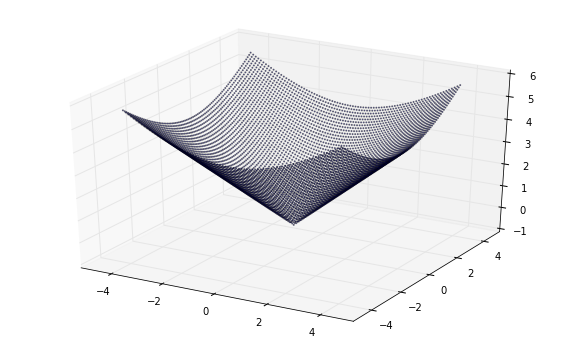

In [42]:
fig = plt.figure(figsize = (10, 6))
ax = plt.axes(projection = '3d')
ax.scatter(X, Y, F, s=1, alpha = 0.5)

# Exercize 1: Gaussian distributions

Using the technique introduced above, we would like to plot a normal Gaussian probability distribution
with mean vector $\mu = (0, 0)$ and covariance matrix $\Sigma =I$ also known as standard normal distribution.
We consider the same discretization as above, (i.e. a grid from -4 to 4 using step size 0.1). 
For two dimensional input spaces, the standard normal distribution is given by 
$$
p(x, y) =\frac{1}{2\pi}\exp^{-0.5(x^2+y^2)}.
$$
This distributionsums to 1 when interated over $\mathbb{R}^2$. However, it does not sum to 1 when summing over the discretized space (i.e. the grid). Instead, we can work with a discretized Gaussian-like distribution:
$$P(x, y) = \frac{1}{Z}\exp^{-0.5(x^2+y^2)}, \text{with } Z = \sum_{x, y}\exp^{-0.5(x^2+y^2)}$$
where the sum runs over the whole discretized space.

- Compute the distribution $P(x, y)$, and plot it.
- Compute the conditional distribution $Q(x, y) = P\left(\left.(x,y)\right|\sqrt{x^2+y^2}\ge 1\right)$, and plot it.
- Marginalize the conditioned distribution $Q(x, y)$ over $y$, and plot the resulting distribution $Q(x). 


In [22]:
import math
import numpy
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def P_raw(x, y):
    return( numpy.exp(-0.5 * (x**2 + y**2))) 


In [23]:
R        = numpy.arange(-4, 4+1e-9,0.1)
X, Y     = numpy.meshgrid(R, R)
rawProbs = P_raw(X,Y)
numpy.sum(rawProbs)

628.25463268301951

In [24]:
def P(x, y):
    return( numpy.exp(-0.5 * (x**2 + y**2))/628.25463268301951) 

# Testing whether we get the right  normalization
numpy.sum(P(X,Y))


1.0

## Compute the distribution $P(x, y)$, and plot it.


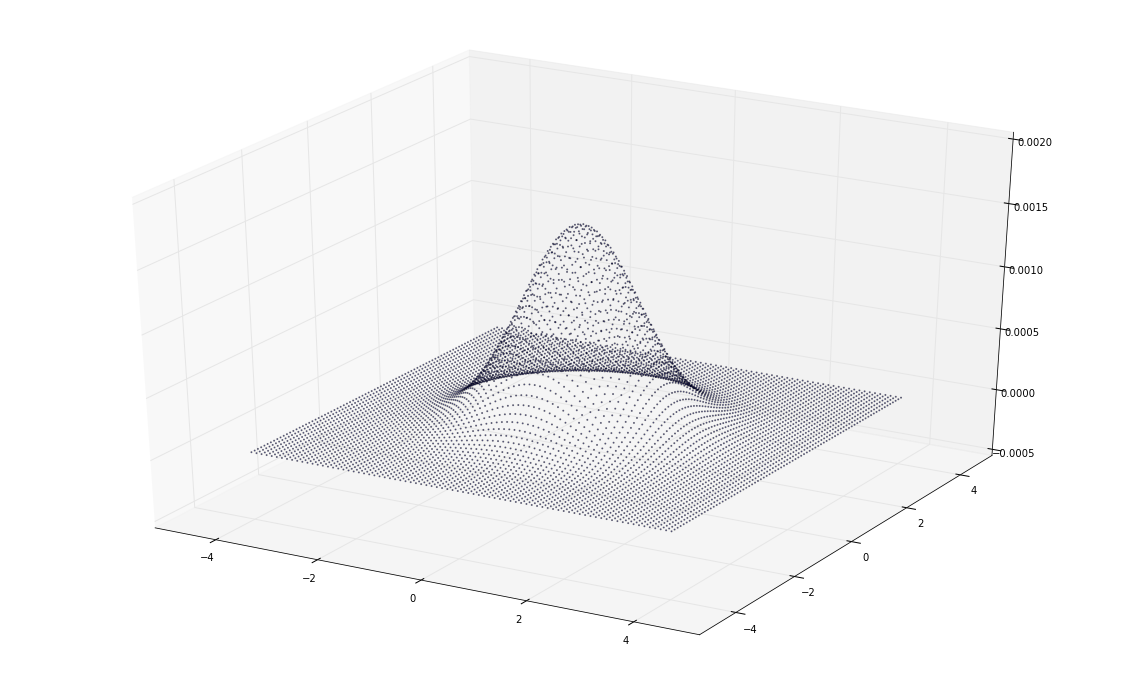

In [26]:
fig1 = plt.figure(figsize = (20, 12))
ax = plt.axes(projection = '3d')
ax.scatter(X, Y, P(X, Y), s=1, alpha = 0.5)

## Compute the conditional distribution $Q(x, y) = P\left(\left.(x,y)\right|\sqrt{x^2+y^2}\ge 1\right)$, and plot it.


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

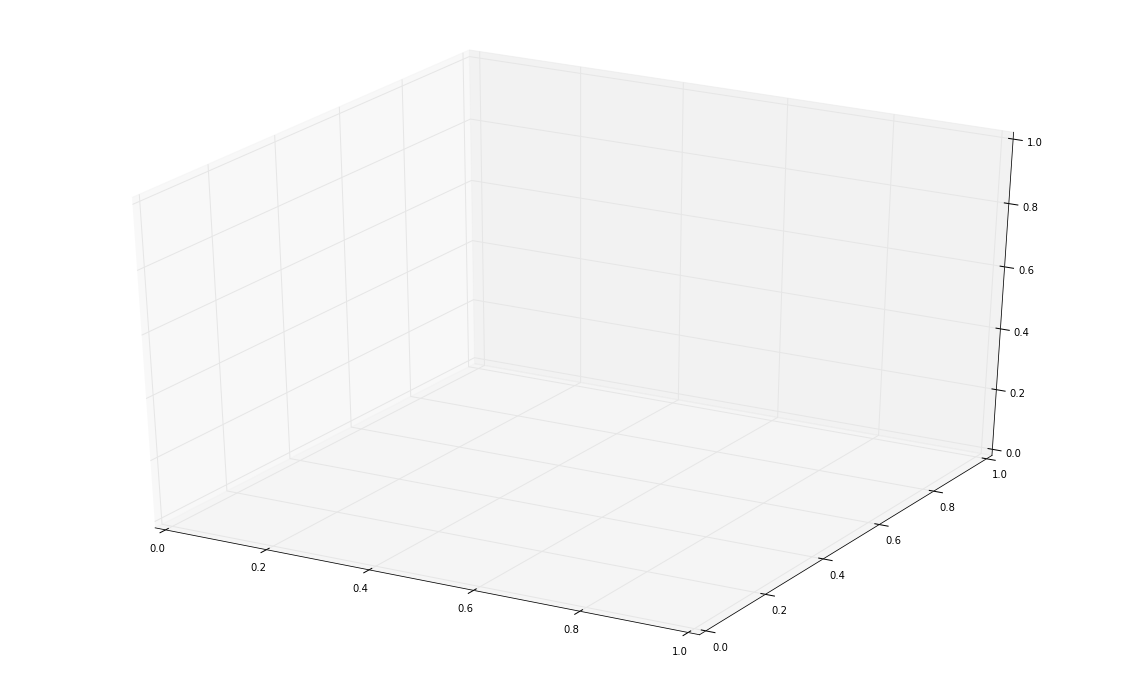

In [33]:
def Q(x, y):
    if (x**2 + y**2) < 1.0:
        0.0
    else:
        P(x, y)

fig2 = plt.figure(figsize = (20, 12))
ax = plt.axes(projection = '3d')
ax.scatter(X, Y, Q(X, Y), s=1, alpha = 0.5)        